In [ ]:
#https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
data = read_csv('pima-indians-diabetes.data.csv', header=None)
values = data.values


In [12]:
print( values.shape )
print( values[1,2])
print(values[:,:-1].shape)
print(values[:,-1].shape)
print(values[:,-1][3])

(768, 9)
66.0
(768, 8)
(768,)
0.0


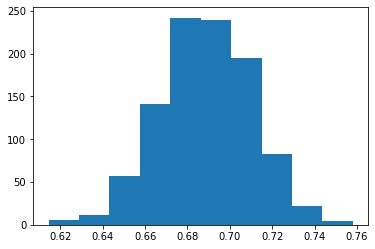

In [14]:
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)
	test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
	# fit model
    # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
	model = DecisionTreeClassifier()
	model.fit(train[:,:-1], train[:,-1])
	# evaluate model
	predictions = model.predict(test[:,:-1])
	score = accuracy_score(test[:,-1], predictions)
	#print(score)
	stats.append(score)
# plot scores
pyplot.hist(stats)
pyplot.show()


In [15]:
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 64.7% and 72.9%
